<a href="https://colab.research.google.com/github/adiegn/Soft-Computing/blob/main/5200411486_SC_M05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pyit2fls

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


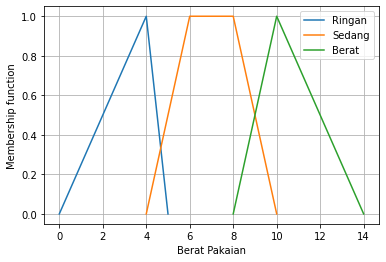

In [ ]:
from pyit2fls import zero_mf, singleton_mf, const_mf, tri_mf, ltri_mf, rtri_mf, trapezoid_mf, gaussian_mf
import matplotlib.pyplot as plt
from numpy import linspace

domainr = linspace(0., 5, 1000)
domains = linspace(4., 10, 1000)
domainb = linspace(8., 14, 1000)
# mySet = T1FS(domain, trapezoid_mf, [4, 6, 8, 10, 1.0])
# mySet.plot()


trapezoid = trapezoid_mf(domains, [4, 6, 8, 10, 1.0])
ltri = tri_mf(domainr, [0, 4, 5, 1.0])
rtri = tri_mf(domainb, [8, 10, 14, 1.0 ])

plt.figure()
plt.plot(domainr, ltri, label="Ringan")
plt.plot(domains, trapezoid, label="Sedang")
plt.plot(domainb, rtri, label="Berat")
plt.grid(True)
plt.legend()
plt.xlabel("Berat Pakaian")
plt.ylabel("Membership function")
# plt.savefig('fungsi_keanggotaan_berat_pakaian.png')
plt.show()


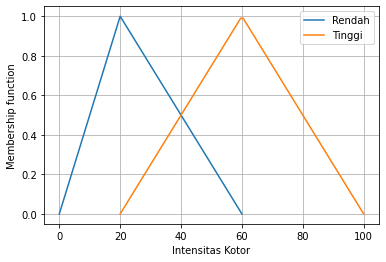

In [ ]:
domain = linspace(0., 60, 100)
domain2 = linspace(20., 100, 100)

ltri = tri_mf(domain, [0, 20, 60, 1.0])
rtri = tri_mf(domain2, [20, 60, 100, 1.0 ])

plt.figure()
plt.plot(domain, ltri, label="Rendah")
plt.plot(domain2, rtri, label="Tinggi")
plt.grid(True)
plt.legend()
plt.xlabel("Intensitas Kotor")
plt.ylabel("Membership function")
plt.savefig('fungsi_keanggotaan_intensitas_kotor.png')
plt.show()


/usr/local/lib/python3.7/dist-packages/pyit2fls/pyit2fls.py:247: RuntimeWarning: divide by zero encountered in true_divide
  return minimum(1, maximum(0, ((((params[4] * ((x - params[0]) / (params[1] - params[0]))) * (x <= params[1])) +
/usr/local/lib/python3.7/dist-packages/pyit2fls/pyit2fls.py:247: RuntimeWarning: invalid value encountered in multiply
  return minimum(1, maximum(0, ((((params[4] * ((x - params[0]) / (params[1] - params[0]))) * (x <= params[1])) +
/usr/local/lib/python3.7/dist-packages/pyit2fls/pyit2fls.py:248: RuntimeWarning: divide by zero encountered in true_divide
  ((params[4] * ((params[3] - x) / (params[3] - params[2]))) * (x >= params[2]))) +
/usr/local/lib/python3.7/dist-packages/pyit2fls/pyit2fls.py:248: RuntimeWarning: invalid value encountered in multiply
  ((params[4] * ((params[3] - x) / (params[3] - params[2]))) * (x >= params[2]))) +


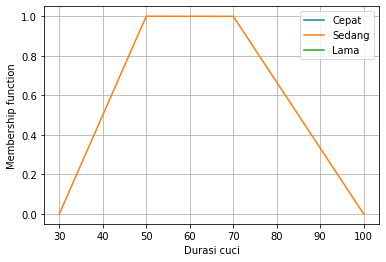

In [ ]:
domainc = linspace(0., 50, 1000)
domains = linspace(30., 100, 1000)
domainl = linspace(70., 120, 1000)

trapezoid = trapezoid_mf(domains, [30, 50, 70, 100, 1.0])
trapezoidc = trapezoid_mf(domains, [0, 0, 30, 50, 1.0])
trapezoidl = trapezoid_mf(domains, [70, 100, 120, 120, 1.0])
# ltri = tri_mf(domainc, [0, 30, 50, 1.0])
# rtri = tri_mf(domainl, [70, 100, 120, 1.0 ])

plt.figure()
# plt.plot(domainc, ltri, label="Cepat")
plt.plot(domainc, trapezoidc, label="Cepat")
plt.plot(domains, trapezoid, label="Sedang")
plt.plot(domainl, trapezoidl, label="Lama")
# plt.plot(domainl, rtri, label="Lama")
plt.grid(True)
plt.legend()
plt.xlabel("Durasi cuci")
plt.ylabel("Membership function")
# plt.savefig('fungsi_keanggotaan_durasi_cuci.png')
plt.show()

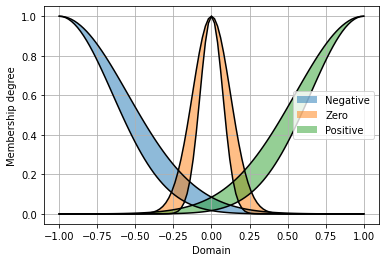

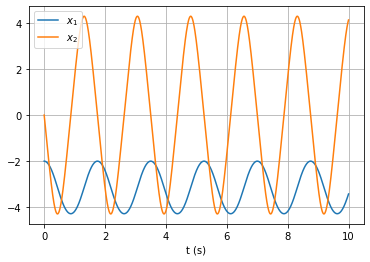

/usr/local/lib/python3.7/dist-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


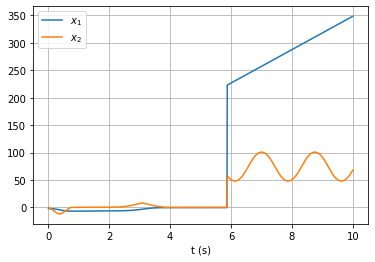

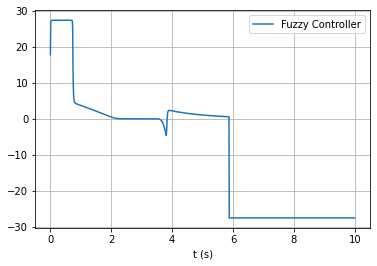

In [ ]:
import matplotlib.pyplot as plt
from pyit2fls import IT2FS_Gaussian_UncertStd, IT2FLS, \
                     min_t_norm, product_t_norm, max_s_norm, IT2FS_plot
from numpy import  array, linspace
from numpy import cos as c, sin as s
from scipy.integrate import odeint


g = 9.8
mc = 1.
m = 0.1
l = 0.5

def dynamic(X, t, u):
    x1 = X[0]
    x2 = X[1]
    x1_dot = x2
    x2_dot = (g * s(x1) - 
              m * l * x2 ** 2 * c(x1) * s(x1) / (mc + m)) / \
        (l * (4./3. - m * c(x1) ** 2 / (mc + m))) + \
        u(X, t) * (c(x1) / (m + mc)) / (l * (4./3. - m * c(x1) ** 2 / (mc + m)))
    return array([x1_dot, 
                  x2_dot])


if __name__ == "__main__":
    
    domain = linspace(-1., 1., 101)
    N = IT2FS_Gaussian_UncertStd(domain, [-1., 0.4, 0.1, 1.])
    Z = IT2FS_Gaussian_UncertStd(domain, [0., 0.1, 0.05, 1.])
    P = IT2FS_Gaussian_UncertStd(domain, [1., 0.4, 0.1, 1.])
    IT2FS_plot(N, Z, P, 
               legends=["Negative", "Zero", "Positive"])
    
    it2fls = IT2FLS()
    it2fls.add_input_variable("x1")
    it2fls.add_input_variable("x2")
    it2fls.add_output_variable("O")
    
    it2fls.add_rule([("x1", N), ("x2", N)], [("O", P)])
    it2fls.add_rule([("x1", N), ("x2", P)], [("O", Z)])
    it2fls.add_rule([("x1", P), ("x2", N)], [("O", Z)])
    it2fls.add_rule([("x1", P), ("x2", P)], [("O", N)])

    def u_fuzzy(X, t):
        x1 = max(-1., min(1., X[0]))
        x2 = max(-1., min(1., X[1]))
        c, TR = it2fls.evaluate({"x1":x1, "x2":x2},
                        product_t_norm, max_s_norm, domain, method="Centroid", 
                        algorithm="EKM")
        o = (TR["O"][0] + TR["O"][1]) / 2
        return 40 * o
    
    def u_zero(X, t):
        return 0
        
    
    X0 = [-2., 0.]
    t = linspace(0.0, 10.0, 1000)
    X = odeint(dynamic, X0, t, args=(u_zero, ))
    plt.figure()
    plt.plot(t, X[:, 0], label=r"$x_{1}$")
    plt.plot(t, X[:, 1], label=r"$x_{2}$")
    plt.xlabel("t (s)")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    X = odeint(dynamic, X0, t, args=(u_fuzzy, ))
    plt.figure()
    plt.plot(t, X[:, 0], label=r"$x_{1}$")
    plt.plot(t, X[:, 1], label=r"$x_{2}$")
    plt.xlabel("t (s)")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    u = []
    for x, tt in zip(X, t):
        u.append(u_fuzzy(x, tt))
    u = array(u)
    plt.figure()
    plt.plot(t, u, label=r"Fuzzy Controller")
    plt.xlabel("t (s)")
    plt.legend()
    plt.grid(True)
    plt.show()

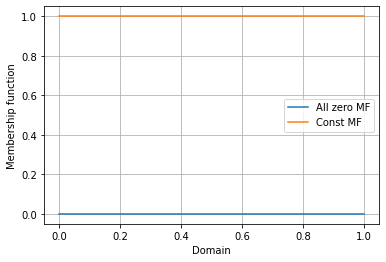

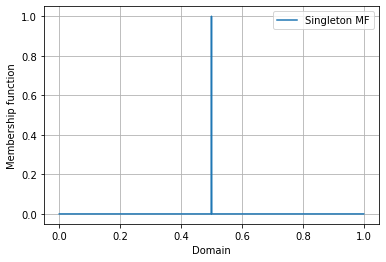

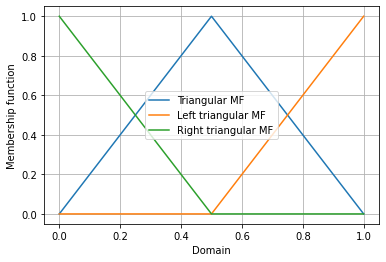

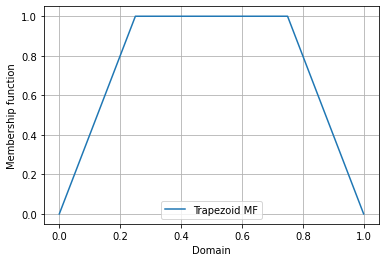

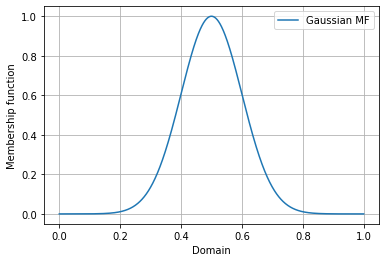

In [ ]:
from numpy import linspace
import matplotlib.pyplot as plt
from pyit2fls import zero_mf, singleton_mf, const_mf, tri_mf, ltri_mf, rtri_mf, \
    trapezoid_mf, gaussian_mf

domain = linspace(0., 1., 1001)

zero = zero_mf(domain)
singleton = singleton_mf(domain, [0.5, 1.])
const = const_mf(domain, [1.])
tri = tri_mf(domain, [0., 0.5, 1., 1.])
ltri = ltri_mf(domain, [0.5, 1., 1.])
rtri = rtri_mf(domain, [0.5, 0., 1.])
trapezoid = trapezoid_mf(domain, [0., 0.25, 0.75, 1., 1.])
gaussian = gaussian_mf(domain, [0.5, 0.1, 1.])

plt.figure()
plt.plot(domain, zero, label="All zero MF")
plt.plot(domain, const, label="Const MF")
plt.grid(True)
plt.legend()
plt.xlabel("Domain")
plt.ylabel("Membership function")
plt.show()

plt.figure()
plt.plot(domain, singleton, label="Singleton MF")
plt.grid(True)
plt.legend()
plt.xlabel("Domain")
plt.ylabel("Membership function")
plt.show()

plt.figure()
plt.plot(domain, tri, label="Triangular MF")
plt.plot(domain, ltri, label="Left triangular MF")
plt.plot(domain, rtri, label="Right triangular MF")
plt.grid(True)
plt.legend()
plt.xlabel("Domain")
plt.ylabel("Membership function")
plt.show()

plt.figure()
plt.plot(domain, trapezoid, label="Trapezoid MF")
plt.grid(True)
plt.legend()
plt.xlabel("Domain")
plt.ylabel("Membership function")
plt.show()

plt.figure()
plt.plot(domain, gaussian, label="Gaussian MF")
plt.grid(True)
plt.legend()
plt.xlabel("Domain")
plt.ylabel("Membership function")
plt.show()

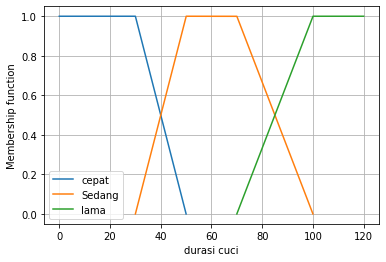

In [ ]:
from pyit2fls import zero_mf, singleton_mf, const_mf, tri_mf, ltri_mf, rtri_mf, trapezoid_mf, gaussian_mf
import matplotlib.pyplot as plt
from numpy import linspace

domainr = linspace(0., 50, 1000)
domains2 = linspace(30., 100, 1000)
domainb3 = linspace(70., 120, 1000)
# mySet = T1FS(domain, trapezoid_mf, [4, 6, 8, 10, 1.0])
# mySet.plot()


trapezoid = trapezoid_mf(domains2, [30, 50, 70, 100, 1.0])
ltri = rtri_mf(domainr, [50, 30, 1.0])
rtri = ltri_mf(domainb3, [70, 100, 1.0 ])

plt.figure()
plt.plot(domainr, ltri, label="cepat")
plt.plot(domains2, trapezoid, label="Sedang")
plt.plot(domainb3, rtri, label="lama")
plt.grid(True)
plt.legend()
plt.xlabel("durasi cuci")
plt.ylabel("Membership function")
# plt.savefig('fungsi_keanggotaan_berat_pakaian.png')
plt.show()
